In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/data.csv")

In [3]:
df 

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


**df** : training set
<br>
**x(i)** : "input" variables (mileage in this example)
<br>
**y(i)** : "Output" or target variable that we are trying to predict (Price)
<br>
the pair **(x(i),y(i))** is called a training example
<br>

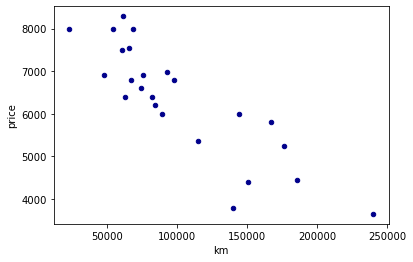

In [4]:
ax = df.plot.scatter(x='km',
                     y='price',
                     c='DarkBlue')

# Hypothesis

Our goal is given a training set, to learn a function *h: X -> Y* so that h(x) is a predictor for the corresponding value of y.
<br>
**h(x)** : Hypothesis
<br>
**$θ_{i}$** : Parameters of the model
<br>
<center>h(x) = $θ_{0}$ + ($θ_{1}$ * x)<center>
    

# Cost Function

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.
<br>
\begin{equation*}
J(θ_0,θ_1) = \frac{1}{2n} \left( \sum_{k=1}^n (h_θ(x_i) - y_i)^2 \right)
\end{equation*}
<br>
**n** : Number of training examples

# Gradient  Descent

Have some function J(${θ_0}$,${θ_1}$)
<br>
Want min J(${θ_0}$,${θ_1}$)
<h4>Outline :</h4>
<br>
<ul>
  <li>Start with some ${θ_0}$,${θ_1}$</li>
  <li>Keep changing ${θ_0}$,${θ_1}$ to reduce J(${θ_0}$,${θ_1}$) until we hopefully end up at a minimum</li>
</ul> 

<h4>The gradient descent algorithm is:</h4>
<br>
repeat until convergence:  {
\begin{equation*}
tmp_0 := θ_0 - α\frac{\partial}{\partial θ_0}J(θ_0,θ_1)
\end{equation*}
\begin{equation*}
tmp_1 := θ_1 - α\frac{\partial}{\partial θ_1}J(θ_0,θ_1)
\end{equation*}
<center>${θ_0}$ := ${tmp_0}$
<br>
${θ_1}$ := ${tmp_1}$</center>
<br>
}
<br>

**α** : Learning rate 
<br>
if α is too small, gradient descent can be slow.
<br>
if α is too large, gradient descent can overshoot the minimum. it may fail to converge, or even diverge.

# Gradient Descent For Linear Regression

<h4>The gradient descent algorithm for linear regression is:</h4>
<br>
repeat until convergence:  {
\begin{equation*}
tmp_0 := θ_0 - α\frac{1}{n} \left( \sum_{k=1}^n (h_θ(x_i) - y_i)\right)
\end{equation*}
\begin{equation*}
tmp_1 := θ_1 - α\frac{1}{n} \left( \sum_{k=1}^n ((h_θ(x_i) - y_i)x_i)\right)
\end{equation*}
<center>${θ_0}$ := ${tmp_0}$
<br>
${θ_1}$ := ${tmp_1}$</center>
<br>
}
<br>

In [5]:
###################################
######### init  Variables #########
###################################

m = 0
b = 0
error = -100000
data_length = df.shape[0]

In [6]:
###################################
#### limit MaxPrice-MaxKm to 1 ####
###################################

maxKm = df["km"].max() + (df["km"].max() / 5)
maxPrice = df["price"].max() + (df["price"].max() / 5)
df["km"] = df["km"].apply(lambda x: x / maxKm)
df["price"] = df["price"].apply(lambda x: x / maxPrice)

In [7]:
###################################
# Gradient Descent implementation #
###################################

while (1):
    learning_rate = 0.01
    tmp_m = 0;
    tmp_b = 0;
    err_diff = error
    for data in df.itertuples(index=True, name='Pandas'):
        x = data.km;
        y = data.price;
        h = m * x + b;
        error = h - y;
        tmp_b += error;
        tmp_m += error * x;
    b -= learning_rate * (1 / data_length) * tmp_b;
    m -= learning_rate * (1 / data_length) * tmp_m;
    if error - err_diff < 0.000001:
        break
print (m,b)

-0.5970090691535049 0.8457520695997242


Price: 7941 | Km : 22899


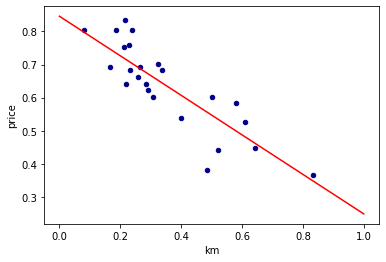

In [8]:
###################################
########### Test Result ###########
###################################
test = 22899
tmp = test / maxKm
print ( "Price:",int((tmp * m + b) * maxPrice), "| Km :", test)
ax = df.plot.scatter(x='km', y='price', c='DarkBlue')
x = np.linspace(0,1,100)
y = x * m + b
plt.plot(x, y, '-r')